In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, root_mean_squared_error
# Carregar CSV como DataFrame (sem índice)
caminho_csv = 'data\dataframe.csv'  # Substitua pelo caminho correto
df = pd.read_csv(caminho_csv)
df.head()

,CP1,CP2,CP3,CP4,CP5,CP6,CP7,CP8,CP9,CP10,CP11,CP12,airfoil,Cl,Cd,Alpha,Re
0,0.0,0.047741,0.068567,0.032866,0.022769,0.00105,0.0,-0.048052,-0.067747,-0.03376,-0.022406,-0.00105,naca1410,-1.121109,0.015669,-9.804158,3000000
1,0.0,0.047741,0.068567,0.032866,0.022769,0.00105,0.0,-0.048052,-0.067747,-0.03376,-0.022406,-0.00105,naca1410,-1.092091,0.015091,-9.804158,3000000
2,0.0,0.047741,0.068567,0.032866,0.022769,0.00105,0.0,-0.048052,-0.067747,-0.03376,-0.022406,-0.00105,naca1410,-1.080654,0.014569,-9.804158,3000000
3,0.0,0.047741,0.068567,0.032866,0.022769,0.00105,0.0,-0.048052,-0.067747,-0.03376,-0.022406,-0.00105,naca1410,-1.057541,0.013933,-9.804158,3000000
4,0.0,0.047741,0.068567,0.032866,0.022769,0.00105,0.0,-0.048052,-0.067747,-0.03376,-0.022406,-0.00105,naca1410,-1.028489,0.013412,-9.804158,3000000


In [2]:
df.columns

Index(['CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CP7', 'CP8', 'CP9', 'CP10',
       'CP11', 'CP12', 'airfoil', 'Cl', 'Cd', 'Alpha', 'Re'],
      dtype='object')

In [3]:
# Filtrar os dados para Alpha entre 0 e 15
df = df[(df['Alpha'] >= 0) & (df['Alpha'] <= 15)]

In [4]:
# Separação dos aerofólios para treino e teste
aerofolios_unicos = df['airfoil'].unique()
np.random.seed(42)
aerofolios_treino = np.random.choice(aerofolios_unicos, size=int(len(aerofolios_unicos) * 0.95), replace=False)
aerofolios_teste = [a for a in aerofolios_unicos if a not in aerofolios_treino]

print(f'Aerofólios Treino: {aerofolios_treino}')
print(f'Aerofólios Teste: {aerofolios_teste}')

Aerofólios Treino: ['naca632615' 'naca0012' 'naca23018' 'naca001264' 'naca632015'
 'naca631412' 'naca2424' 'naca4418' 'naca23021' 'naca631212' 'naca0006'
 'naca1408' 'naca4415' 'naca63009' 'naca63206' 'naca63006' 'naca001035'
 'naca4424' 'naca1410' 'naca632415' 'naca2412' 'naca001034a08' 'naca2410'
 'naca2421' 'naca1412' 'naca4421' 'naca23024' 'naca23012' 'naca63209'
 'naca2408' 'naca2415' 'naca001264a08' 'naca4412' 'naca23015' 'naca63210'
 'naca0009' 'naca631012' 'naca001034']
Aerofólios Teste: ['naca2418', 'naca632215']


In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Criar DataFrames de treino e teste
df_train_cl = df[df['airfoil'].isin(aerofolios_treino)]
df_train_cd = df_train_cl.dropna(subset=['Cd'])  # Apenas remove NaN para Cd
df_test_cl = df[df['airfoil'].isin(aerofolios_teste)]
df_test_cd = df_test_cl.dropna(subset=['Cd'])  # Apenas remove NaN para Cd

# Definir entradas (features) e saídas (targets)
features = ['CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CP7', 'CP8', 'CP9', 'CP10', 'CP11', 'CP12', 'Alpha', 'Re']

X_train_cl, y_train_cl = df_train_cl[features], df_train_cl['Cl'].to_numpy().ravel()
X_test_cl, y_test_cl = df_test_cl[features], df_test_cl['Cl'].to_numpy().ravel()

X_train_cd, y_train_cd = df_train_cd[features], df_train_cd['Cd'].to_numpy().ravel()
X_test_cd, y_test_cd = df_test_cd[features], df_test_cd['Cd'].to_numpy().ravel()

# Modelos a serem testados
modelos = {
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(),
    'MLP': MLPRegressor(random_state=42)
}

# Dicionário para armazenar os modelos treinados e resultados
modelos_treinados = {}
resultados = {}

def calcular_acuracia(y_true, y_pred, tolerancia=0.1):
    return np.mean(np.abs(y_true - y_pred) / np.abs(y_true) <= tolerancia)

# Função de avaliação
def avaliar(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    acc = calcular_acuracia(y_true, y_pred)
    return {'MAE': mae, 'R²': r2, 'MSE': mse, 'RMSE': rmse, 'Acurácia': acc}

for nome, modelo in modelos.items():
    print(f'\nTreinando {nome}...')
    
    # Treinar para Cl (mantendo todas as linhas)
    modelo_cl = modelo.fit(X_train_cl, y_train_cl)
    y_pred_cl = modelo_cl.predict(X_test_cl)
    
    # Treinar para Cd (apenas linhas sem NaN)
    modelo_cd = modelo.fit(X_train_cd, y_train_cd)
    y_pred_cd = modelo_cd.predict(X_test_cd)
    
    # Avaliar
    resultado_cl = avaliar(y_test_cl, y_pred_cl)
    resultado_cd = avaliar(y_test_cd, y_pred_cd)
    
    # Salvar modelos treinados e resultados
    modelos_treinados[nome] = {'Cl': modelo_cl, 'Cd': modelo_cd}
    resultados[nome] = {'Cl': resultado_cl, 'Cd': resultado_cd}

# Exibir resultados finais formatados
print("\n📊 Resultados de todos os modelos:\n")
print(f"{'Modelo':<20}{'MAE Cl':<10}{'MSE Cl':<10}{'RMSE Cl':<10}{'R² Cl':<10}{'Acc Cl':<10}{'MAE Cd':<10}{'MSE Cd':<10}{'RMSE Cd':<10}{'R² Cd':<10}{'Acc Cd':<10}")
print("-" * 10)

for nome, res in resultados.items():
    print(f"{nome:<20}{res['Cl']['MAE']:.4f}    {res['Cl']['MSE']:.4f}    {res['Cl']['RMSE']:.4f}    {res['Cl']['R²']:.4f}    {res['Cl']['Acurácia']:.4f}    "
          f"{res['Cd']['MAE']:.4f}    {res['Cd']['MSE']:.4f}    {res['Cd']['RMSE']:.4f}    {res['Cd']['R²']:.4f}    {res['Cd']['Acurácia']:.4f}")

print("\n✅ Treinamento e avaliação concluídos!")


Treinando Gradient Boosting...

Treinando Random Forest...

Treinando XGBoost...

Treinando SVR...

Treinando KNN...

Treinando MLP...

📊 Resultados de todos os modelos:

Modelo              MAE Cl    MSE Cl    RMSE Cl   R² Cl     Acc Cl    MAE Cd    MSE Cd    RMSE Cd   R² Cd     Acc Cd    
----------
Gradient Boosting   0.0477    0.0043    0.0652    0.9683    0.7597    0.0004    0.0000    0.0006    0.9465    0.9018
Random Forest       0.0406    0.0026    0.0508    0.9807    0.7983    0.0004    0.0000    0.0006    0.9520    0.8661
XGBoost             0.0796    0.0078    0.0882    0.9420    0.5451    0.0005    0.0000    0.0006    0.9444    0.8214
SVR                 0.3205    0.1413    0.3759    -0.0540    0.1116    0.0024    0.0000    0.0028    -0.2044    0.2054
KNN                 0.1784    0.3255    0.5705    -1.4282    0.5923    0.0008    0.0000    0.0010    0.8385    0.5982
MLP                 235.1855    64756.2786    254.4725    -483101.6003    0.0000    0.2797    0.0928    0.30

In [6]:
# Criar DataFrames de treino e teste
df_train_cl = df[df['airfoil'].isin(aerofolios_treino)]
df_train_cd = df_train_cl.dropna(subset=['Cd'])  # Apenas remove NaN para Cd
df_test_cl = df[df['airfoil'].isin(aerofolios_teste)]
df_test_cd = df_test_cl.dropna(subset=['Cd'])  # Apenas remove NaN para Cd

# Definir entradas (features) e saídas (targets)
features = ['CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CP7', 'CP8', 'CP9', 'CP10', 'CP11', 'CP12', 'Alpha', 'Re']

X_train_cl, y_train_cl = df_train_cl[features], df_train_cl['Cl'].to_numpy().ravel()
X_test_cl, y_test_cl = df_test_cl[features], df_test_cl['Cl'].to_numpy().ravel()

X_train_cd, y_train_cd = df_train_cd[features], df_train_cd['Cd'].to_numpy().ravel()
X_test_cd, y_test_cd = df_test_cd[features], df_test_cd['Cd'].to_numpy().ravel()

# Criar e treinar modelo para Cl
gbr_cl = GradientBoostingRegressor(random_state=42)
gbr_cl.fit(X_train_cl, y_train_cl)

# Criar e treinar modelo para Cd
gbr_cd = GradientBoostingRegressor(random_state=42)
gbr_cd.fit(X_train_cd, y_train_cd)

# Previsões
y_pred_cl = gbr_cl.predict(X_test_cl)
y_pred_cd = gbr_cd.predict(X_test_cd)

In [7]:
# Avaliação
def avaliar(y_true, y_pred, label):
    print(f'--- {label} ---')
    print(f'MAE: {mean_absolute_error(y_true, y_pred):.4f}')
    print(f'MSE: {mean_squared_error(y_true, y_pred):.4f}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}')
    print(f'R²: {r2_score(y_true, y_pred):.4f}')
    print(f'Acurácia: {calcular_acuracia(y_true, y_pred):.4f}\n')

avaliar(y_test_cl, y_pred_cl, 'Cl')
avaliar(y_test_cd, y_pred_cd, 'Cd')

--- Cl ---
MAE: 0.0477
MSE: 0.0043
RMSE: 0.0652
R²: 0.9683
Acurácia: 0.7597

--- Cd ---
MAE: 0.0004
MSE: 0.0000
RMSE: 0.0006
R²: 0.9465
Acurácia: 0.9018



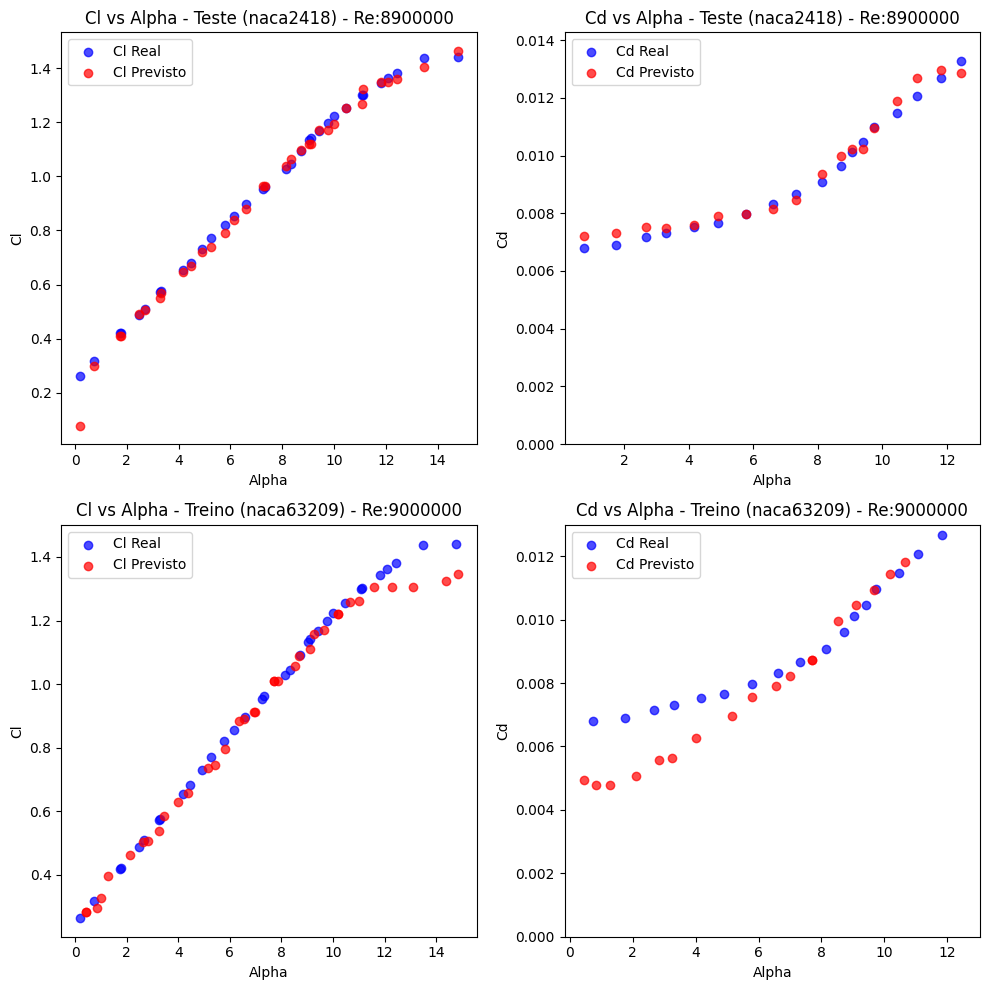

In [26]:
# Avalição visual airfoil usado para teste
np.random.seed(42)
aerofolio_escolhido_teste = np.random.choice(aerofolios_teste)
df_eval = df[df['airfoil'] == aerofolio_escolhido_teste]
Re_escolhido = np.random.choice(df_eval['Re'].unique())
df_eval = df_eval[df_eval['Re'] == Re_escolhido]
df_eval_cd = df_eval.dropna(subset=['Cd'])
features = ['CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CP7', 'CP8', 'CP9', 'CP10', 'CP11', 'CP12', 'Alpha', 'Re']
X_test_cl = df_eval[features]
X_test_cd = df_eval_cd[features]
y_pred_cl = gbr_cl.predict(X_test_cl)
y_pred_cd = gbr_cd.predict(X_test_cd)

# Plots
plt.figure(figsize=(10, 10))

# Teste - Cl
plt.subplot(2, 2, 1)
plt.scatter(df_eval['Alpha'], df_eval['Cl'], color='blue', label='Cl Real', alpha=0.7)
plt.scatter(X_test_cl['Alpha'], y_pred_cl, color='red', label='Cl Previsto', alpha=0.7)
plt.xlabel('Alpha')
plt.ylabel('Cl')
plt.title(f'Cl vs Alpha - Teste ({aerofolio_escolhido_teste}) - Re:{Re_escolhido}')
plt.legend()

# Teste - Cd
plt.subplot(2, 2, 2)
plt.scatter(df_eval['Alpha'], df_eval['Cd'], color='blue', label='Cd Real', alpha=0.7)
plt.scatter(X_test_cd['Alpha'], y_pred_cd, color='red', label='Cd Previsto', alpha=0.7)
plt.ylim([0, max(0.01, y_pred_cd.max() * 1.1)])
plt.xlabel('Alpha')
plt.ylabel('Cd')
plt.title(f'Cd vs Alpha - Teste ({aerofolio_escolhido_teste}) - Re:{Re_escolhido}')
plt.legend()

# Avalição visual airfoil usado para treino
np.random.seed(42)
aerofolio_escolhido_treino = np.random.choice(aerofolios_treino)
df_eval_treino = df[df['airfoil'] == aerofolio_escolhido_treino]
Re_escolhido = np.random.choice(df_eval_treino['Re'].unique())
df_eval_treino = df_eval_treino[df_eval_treino['Re'] == Re_escolhido]
df_eval_cd = df_eval_treino.dropna(subset=['Cd'])
features = ['CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CP7', 'CP8', 'CP9', 'CP10', 'CP11', 'CP12', 'Alpha', 'Re']
X_test_cl = df_eval_treino[features]
X_test_cd = df_eval_cd[features]
y_pred_cl = gbr_cl.predict(X_test_cl)
y_pred_cd = gbr_cd.predict(X_test_cd)

# Treino - Cl
plt.subplot(2, 2, 3)
plt.scatter(df_eval['Alpha'], df_eval['Cl'], color='blue', label='Cl Real', alpha=0.7)
plt.scatter(X_test_cl['Alpha'], y_pred_cl, color='red', label='Cl Previsto', alpha=0.7)
plt.xlabel('Alpha')
plt.ylabel('Cl')
plt.title(f'Cl vs Alpha - Treino ({aerofolio_escolhido_treino}) - Re:{Re_escolhido}')
plt.legend()

# Treino - Cd
plt.subplot(2, 2, 4)
plt.scatter(df_eval['Alpha'], df_eval['Cd'], color='blue', label='Cd Real', alpha=0.7)
plt.scatter(X_test_cd['Alpha'], y_pred_cd, color='red', label='Cd Previsto', alpha=0.7)
plt.ylim([0, max(0.01, y_pred_cd.max() * 1.1)])
plt.xlabel('Alpha')
plt.ylabel('Cd')
plt.title(f'Cd vs Alpha - Treino ({aerofolio_escolhido_treino}) - Re:{Re_escolhido}')
plt.legend()

plt.tight_layout()
plt.show()